In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download Data

In [ ]:
'''
This script downloads TACO's images from Flickr given an annotation json file
Code written by Pedro F. Proenza, 2019
'''

import os.path
import argparse
import json
from PIL import Image
import requests
from io import BytesIO
import sys

# parser = argparse.ArgumentParser(description='')
# parser.add_argument('--dataset_path', required=False, default= './data/annotations.json', help='Path to annotations')
# args = parser.parse_args()

# dataset_dir = os.path.dirname(args.dataset_path)
dataset_dir = '/content/drive/MyDrive/data/TACO/'
if not os.path.isdir(dataset_dir):
    os.mkdir(dataset_dir)

print('Note. If for any reason the connection is broken. Just call me again and I will start where I left.')

# Load annotations
anns_filepath = dataset_dir + '/json/annotations.json'
# anns_filepath = '/content/drive/MyDrive/data/TACO/annotations.json'
with open(anns_filepath, 'r') as f:
    annotations = json.loads(f.read())

    nr_images = len(annotations['images'])
    for i in range(nr_images):

        image = annotations['images'][i]

        file_name = image['file_name']
        url_original = image['flickr_url']
        url_resized = image['flickr_640_url']

        file_path = os.path.join(dataset_dir, file_name)

        # Create subdir if necessary
        subdir = os.path.dirname(file_path)
        if not os.path.isdir(subdir):
            os.mkdir(subdir)

        if not os.path.isfile(file_path):
            # Load and Save Image
            response = requests.get(url_original)
            img = Image.open(BytesIO(response.content))
            if img._getexif():
                img.save(file_path, exif=img.info["exif"])
            else:
                img.save(file_path)

        # Show loading bar
        bar_size = 30
        x = int(bar_size * i / nr_images)
        print("%s[%s%s] - %i/%i\r" % ('Loading: ', "=" * x, "." * (bar_size - x), i, nr_images))
        # sys.stdout.flush()
        i+=1

    print('Finished\n')

Note. If for any reason the connection is broken. Just call me again and I will start where I left.
Loading: [..............................] - 0/1500
Loading: [..............................] - 1/1500
Loading: [..............................] - 2/1500
Loading: [..............................] - 3/1500
Loading: [..............................] - 4/1500
Loading: [..............................] - 5/1500
Loading: [..............................] - 6/1500
Loading: [..............................] - 7/1500
Loading: [..............................] - 8/1500
Loading: [..............................] - 9/1500
Loading: [..............................] - 10/1500
Loading: [..............................] - 11/1500
Loading: [..............................] - 12/1500
Loading: [..............................] - 13/1500
Loading: [..............................] - 14/1500
Loading: [..............................] - 15/1500
Loading: [..............................] - 16/1500
Loading: [................

# Data Exploration

Read Data

In [ ]:
import json

dataset_path = '/content/drive/MyDrive/data/TACO'
anns_file_path = dataset_path + '/' + 'annotations.json'
img_path = '/content/taco'

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

In [ ]:
for key in dataset.keys():
    print(key)

info
images
annotations
scene_annotations
licenses
categories
scene_categories


In [ ]:
print(dataset['info'])

{'year': 2019, 'version': None, 'description': 'TACO', 'contributor': None, 'url': None, 'date_created': '2019-12-19T16:11:15.258399+00:00'}


In [ ]:
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

print(f"# of Categories: {nr_cats} | # of Annotations: {nr_annotations} | # of Images: {nr_images}")

# of Categories: 60 | # of Annotations: 4784 | # of Images: 1500


## Downloading an image via python

{'id': 0, 'width': 1537, 'height': 2049, 'file_name': 'batch_1/000006.jpg', 'license': None, 'flickr_url': 'https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png', 'coco_url': None, 'date_captured': None, 'flickr_640_url': 'https://farm66.staticflickr.com/65535/33978196618_632623b4fc_z.jpg'}


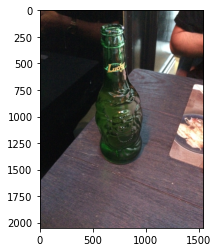

In [ ]:
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt

# Download one image
temp_img = imgs[0]
print(temp_img)
url_original = temp_img['flickr_url']
response = requests.get(url_original)
img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.show()

## Exploring the Dataset

In [ ]:
import pandas as pd

# Create Dataframes easier access
ann_df = pd.DataFrame(anns)
cat_df = pd.DataFrame(categories)
img_df = pd.DataFrame(imgs)

In [ ]:
ann_df.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd
0,1,0,6,"[[561.0, 1238.0, 568.0, 1201.0, 567.0, 1175.0,...",403954.0,"[517.0, 127.0, 447.0, 1322.0]",0
1,2,1,18,"[[928.0, 1876.0, 938.0, 1856.0, 968.0, 1826.0,...",1071259.5,"[1.0, 457.0, 1429.0, 1519.0]",0
2,3,1,14,"[[617.0, 383.0, 703.0, 437.0, 713.0, 456.0, 72...",99583.5,"[531.0, 292.0, 1006.0, 672.0]",0
3,4,2,5,"[[670.0, 993.0, 679.0, 998.0, 684.0, 1001.0, 6...",73832.5,"[632.0, 987.0, 500.0, 374.0]",0
4,5,2,7,"[[647.0, 1028.0, 650.0, 1022.0, 653.0, 1016.0,...",915.0,"[632.0, 989.0, 44.0, 51.0]",0


In [ ]:
cat_df.head()

,supercategory,id,name
0,Aluminium foil,0,Aluminium foil
1,Battery,1,Battery
2,Blister pack,2,Aluminium blister pack
3,Blister pack,3,Carded blister pack
4,Bottle,4,Other plastic bottle


In [ ]:
img_df.head()

,id,width,height,file_name,license,flickr_url,coco_url,date_captured,flickr_640_url
0,0,1537,2049,batch_1/000006.jpg,None,https://farm66.staticflickr.com/65535/33978196...,None,None,https://farm66.staticflickr.com/65535/33978196...
1,1,1537,2049,batch_1/000008.jpg,None,https://farm66.staticflickr.com/65535/47803331...,None,None,https://farm66.staticflickr.com/65535/47803331...
2,2,1537,2049,batch_1/000010.jpg,None,https://farm66.staticflickr.com/65535/40888872...,None,None,https://farm66.staticflickr.com/65535/40888872...
3,3,2049,1537,batch_1/000019.jpg,None,https://farm66.staticflickr.com/65535/47803331...,None,None,https://farm66.staticflickr.com/65535/47803331...
4,4,1537,2049,batch_1/000026.jpg,None,https://farm66.staticflickr.com/65535/33978199...,None,None,https://farm66.staticflickr.com/65535/33978199...


## Category - Super Category Mapping

In [ ]:
# create pandas dataframe to map super category to category
cat2supercat = pd.DataFrame(categories)
supercat_ids_df =  pd.DataFrame(cat2supercat['supercategory'].unique(), columns=["supercategory"])
supercat_ids_df["supercat_id"] = supercat_ids_df.index
cat2supercat = pd.merge(supercat_ids_df, cat2supercat, on="supercategory")
cat2supercat.columns = ["supercategory", "supercat_id", "cat_id", "category"]

print(f"# of Super Categories:{cat2supercat['supercategory'].nunique()}")
print(f"# of Categories:{cat2supercat['category'].nunique()}")

cat2supercat

# of Super Categories:28
# of Categories:60


,supercategory,supercat_id,cat_id,category
0,Aluminium foil,0,0,Aluminium foil
1,Battery,1,1,Battery
2,Blister pack,2,2,Aluminium blister pack
3,Blister pack,2,3,Carded blister pack
4,Bottle,3,4,Other plastic bottle
5,Bottle,3,5,Clear plastic bottle
6,Bottle,3,6,Glass bottle
7,Bottle cap,4,7,Plastic bottle cap
8,Bottle cap,4,8,Metal bottle cap
9,Broken glass,5,9,Broken glass


# Filter Data based on Category with the most data

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

# Count number of annotations per super category
supercat_count = np.zeros(cat2supercat['supercategory'].nunique())
for ann in anns:
    supercat_id = cat2supercat.loc[cat2supercat["cat_id"] == ann['category_id'], "supercat_id"].values[0]
    supercat_count[supercat_id] += 1
# print(supercat_count)

# Sort number of annotations
supercat_names = []
for id, count in enumerate(supercat_count):
    supercat_names.append(cat2supercat.loc[cat2supercat["supercat_id"] == id, "supercategory"].values[0])
# print(len(supercat_names))

d = {"supercategory": supercat_names, "Number of annotations":supercat_count}
supercat_hist_df = pd.DataFrame(d)
supercat_hist_df = pd.merge(supercat_hist_df, cat2supercat[["supercat_id","supercategory"]].drop_duplicates(), on="supercategory", how="left")
supercat_hist_df = supercat_hist_df.sort_values('Number of annotations', axis=0, ascending=False)
supercat_hist_df

,supercategory,Number of annotations,supercat_id
15,Plastic bag & wrapper,850.0,15
27,Cigarette,667.0,27
26,Unlabeled litter,517.0,26
3,Bottle,439.0,3
4,Bottle cap,289.0,4
6,Can,273.0,6
12,Other plastic,273.0,12
7,Carton,251.0,7
8,Cup,192.0,8
24,Straw,161.0,24


In [ ]:
# Get top 9 super categories
max_categories = 9
top_supercats = supercat_hist_df[:max_categories][["supercategory", "supercat_id"]]

# reset id to 1-10
top_supercats = top_supercats.reset_index()
top_supercats = top_supercats.drop('index', axis=1)
top_supercats['new_id'] = top_supercats.index
top_supercats

,supercategory,supercat_id,new_id
0,Plastic bag & wrapper,15,0
1,Cigarette,27,1
2,Unlabeled litter,26,2
3,Bottle,3,3
4,Bottle cap,4,4
5,Can,6,5
6,Other plastic,12,6
7,Carton,7,7
8,Cup,8,8


In [ ]:
dataset_df = pd.merge(ann_df[["id", "category_id", "bbox", "image_id"]], img_df[["id", "file_name"]], left_on='image_id', right_on='id').drop("id_y", axis=1)
dataset_df = dataset_df.rename(columns ={"id_x":"ann_id"})
dataset_df = pd.merge(dataset_df, cat2supercat[["cat_id", "supercategory", "supercat_id"]], left_on="category_id", right_on="cat_id").drop("cat_id", axis=1)
dataset_df = dataset_df[dataset_df.supercategory.isin(top_supercats.supercategory.values)]
dataset_df

# of data items:3751


,ann_id,category_id,bbox,image_id,file_name,supercategory,supercat_id
0,1,6,"[517.0, 127.0, 447.0, 1322.0]",0,batch_1/000006.jpg,Bottle,3
1,24,6,"[379.0, 1127.0, 425.0, 318.0]",10,batch_1/000012.jpg,Bottle,3
2,34,6,"[211.0, 1.0, 417.0, 1417.0]",12,batch_1/000048.jpg,Bottle,3
3,69,6,"[852.0, 638.0, 687.0, 291.0]",25,batch_1/000021.jpg,Bottle,3
4,71,6,"[647.0, 1033.0, 820.0, 376.0]",26,batch_1/000022.jpg,Bottle,3
...,...,...,...,...,...,...,...
4743,717,19,"[318.0, 1308.0476, 1175.0, 1127.9999999999998]",212,batch_11/000011.jpg,Carton,7
4744,3414,19,"[814.0, 728.0, 1418.0, 722.0]",1117,batch_6/000061.JPG,Carton,7
4745,3778,19,"[488.0, 1679.0, 1331.0, 805.0]",1215,batch_7/000051.JPG,Carton,7
4782,2804,24,"[1868.0, 1814.0, 469.0, 240.0]",901,batch_4/000026.JPG,Cup,8


# Filter Data based on specific categories

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

# filter annotations based on the categories we're interested in
filter_cat = ['Bottle', 'Can', 'Cup',]
dataset_df = pd.merge(ann_df[["id", "category_id", "bbox", "image_id"]], img_df[["id", "file_name"]], left_on='image_id', right_on='id').drop("id_y", axis=1)
dataset_df = dataset_df.rename(columns ={"id_x":"ann_id"})
dataset_df = pd.merge(dataset_df, cat2supercat[["cat_id", "supercategory", "supercat_id"]], left_on="category_id", right_on="cat_id").drop("cat_id", axis=1)
dataset_df = dataset_df[dataset_df.supercategory.isin(filter_cat)]

# reset count of supercat_id
train_labels = pd.DataFrame(dataset_df.supercat_id.unique(), columns=["supercat_id"]).reset_index()
train_labels = train_labels.rename(columns={"index":"label"})
dataset_df = pd.merge(dataset_df, train_labels, on="supercat_id").drop("supercat_id", axis=1).rename(columns={"label":"supercat_id"})

dataset_df

,ann_id,category_id,bbox,image_id,file_name,supercategory,supercat_id
0,1,6,"[517.0, 127.0, 447.0, 1322.0]",0,batch_1/000006.jpg,Bottle,0
1,24,6,"[379.0, 1127.0, 425.0, 318.0]",10,batch_1/000012.jpg,Bottle,0
2,34,6,"[211.0, 1.0, 417.0, 1417.0]",12,batch_1/000048.jpg,Bottle,0
3,69,6,"[852.0, 638.0, 687.0, 291.0]",25,batch_1/000021.jpg,Bottle,0
4,71,6,"[647.0, 1033.0, 820.0, 376.0]",26,batch_1/000022.jpg,Bottle,0
...,...,...,...,...,...,...,...
899,3028,22,"[1110.0, 1050.0, 550.0, 433.0]",1017,batch_5/000118.JPG,Cup,2
900,3733,22,"[868.0, 1186.0, 106.0, 89.0]",1209,batch_7/000044.JPG,Cup,2
901,3814,22,"[1716.0, 1246.0, 79.0, 112.0]",1228,batch_7/000066.JPG,Cup,2
902,2804,24,"[1868.0, 1814.0, 469.0, 240.0]",901,batch_4/000026.JPG,Cup,2


# Create new dataset (75:25 split)
This dataset will be written into csv files and will be used for training a NN model

In [ ]:
# Initialize train and test dataframes
train_df = pd.DataFrame()
test_df = pd.DataFrame()

# Get Supercategories
supercats = dataset_df.supercat_id.drop_duplicates()
print(supercats)

# Split each label based on 75:25 split for train and test set
for supercat in supercats:
    data = dataset_df[dataset_df['supercat_id'] == supercat]

    train = data.sample(frac = 0.75, random_state=42)
    train_df = pd.concat([train_df, train], axis=0)

    test = data.drop(train.index)
    test_df = pd.concat([test_df, test], axis=0)

dataset_df

0      0
439    1
712    2
Name: supercat_id, dtype: int64


,ann_id,category_id,bbox,image_id,file_name,supercategory,supercat_id
0,1,6,"[517.0, 127.0, 447.0, 1322.0]",0,batch_1/000006.jpg,Bottle,0
1,24,6,"[379.0, 1127.0, 425.0, 318.0]",10,batch_1/000012.jpg,Bottle,0
2,34,6,"[211.0, 1.0, 417.0, 1417.0]",12,batch_1/000048.jpg,Bottle,0
3,69,6,"[852.0, 638.0, 687.0, 291.0]",25,batch_1/000021.jpg,Bottle,0
4,71,6,"[647.0, 1033.0, 820.0, 376.0]",26,batch_1/000022.jpg,Bottle,0
...,...,...,...,...,...,...,...
899,3028,22,"[1110.0, 1050.0, 550.0, 433.0]",1017,batch_5/000118.JPG,Cup,2
900,3733,22,"[868.0, 1186.0, 106.0, 89.0]",1209,batch_7/000044.JPG,Cup,2
901,3814,22,"[1716.0, 1246.0, 79.0, 112.0]",1228,batch_7/000066.JPG,Cup,2
902,2804,24,"[1868.0, 1814.0, 469.0, 240.0]",901,batch_4/000026.JPG,Cup,2


# Create Dataset (Balanced Test Set)

From the total number of images, the test dataset will have 70 images from each class. The remaining images will be used for the training set.

This split will be used when testing the effect of balanced and imbalanced datasets on model performance

In [ ]:
# Initialize train and test dataframes
train_df = pd.DataFrame()
test_df = pd.DataFrame()

# Get Supercategories
supercats = dataset_df.supercat_id.drop_duplicates()

# Split each label based on 75:25 split for train and test set
for supercat in supercats:
    data = dataset_df[dataset_df['supercat_id'] == supercat]

    test = data.sample(n=70, random_state=42)
    test_df = pd.concat([test_df, test], axis=0)

    train = data.drop(test.index)
    train_df = pd.concat([train_df, train], axis=0)

dataset_df

,ann_id,category_id,bbox,image_id,file_name,supercategory,supercat_id
0,1,6,"[517.0, 127.0, 447.0, 1322.0]",0,batch_1/000006.jpg,Bottle,0
1,24,6,"[379.0, 1127.0, 425.0, 318.0]",10,batch_1/000012.jpg,Bottle,0
2,34,6,"[211.0, 1.0, 417.0, 1417.0]",12,batch_1/000048.jpg,Bottle,0
3,69,6,"[852.0, 638.0, 687.0, 291.0]",25,batch_1/000021.jpg,Bottle,0
4,71,6,"[647.0, 1033.0, 820.0, 376.0]",26,batch_1/000022.jpg,Bottle,0
...,...,...,...,...,...,...,...
899,3028,22,"[1110.0, 1050.0, 550.0, 433.0]",1017,batch_5/000118.JPG,Cup,2
900,3733,22,"[868.0, 1186.0, 106.0, 89.0]",1209,batch_7/000044.JPG,Cup,2
901,3814,22,"[1716.0, 1246.0, 79.0, 112.0]",1228,batch_7/000066.JPG,Cup,2
902,2804,24,"[1868.0, 1814.0, 469.0, 240.0]",901,batch_4/000026.JPG,Cup,2


# Save Train and Test Dataset to csv

In [ ]:
train_df

,ann_id,category_id,bbox,image_id,file_name,supercategory,supercat_id
1,24,6,"[379.0, 1127.0, 425.0, 318.0]",10,batch_1/000012.jpg,Bottle,0
2,34,6,"[211.0, 1.0, 417.0, 1417.0]",12,batch_1/000048.jpg,Bottle,0
3,69,6,"[852.0, 638.0, 687.0, 291.0]",25,batch_1/000021.jpg,Bottle,0
4,71,6,"[647.0, 1033.0, 820.0, 376.0]",26,batch_1/000022.jpg,Bottle,0
5,98,6,"[811.0, 1123.0, 199.0, 350.0]",37,batch_1/000013.jpg,Bottle,0
...,...,...,...,...,...,...,...
898,2166,22,"[670.0, 915.0, 298.0, 307.0]",674,batch_15/000073.jpg,Cup,2
899,3028,22,"[1110.0, 1050.0, 550.0, 433.0]",1017,batch_5/000118.JPG,Cup,2
900,3733,22,"[868.0, 1186.0, 106.0, 89.0]",1209,batch_7/000044.JPG,Cup,2
902,2804,24,"[1868.0, 1814.0, 469.0, 240.0]",901,batch_4/000026.JPG,Cup,2


In [ ]:
test_df

,ann_id,category_id,bbox,image_id,file_name,supercategory,supercat_id
265,3392,5,"[2476.0, 2007.0, 272.0, 328.0]",1110,batch_6/000069.JPG,Bottle,0
78,4254,6,"[190.0, 1297.0, 212.99999999999994, 202.0]",1335,batch_8/000035.jpg,Bottle,0
347,4070,5,"[1039.0, 1681.0, 158.0, 512.0]",1311,batch_8/000011.jpg,Bottle,0
255,3290,5,"[1150.0, 1286.0, 262.0, 557.0]",1103,batch_6/000076.JPG,Bottle,0
327,3881,5,"[59.0, 1072.0, 165.0, 115.0]",1246,batch_7/000085.JPG,Bottle,0
...,...,...,...,...,...,...,...
835,2318,21,"[1341.0, 1390.0, 198.0, 261.0]",737,batch_2/000059.JPG,Cup,2
797,1194,21,"[1011.0, 1589.0, 824.0, 782.0]",353,batch_12/000052.jpg,Cup,2
807,1398,21,"[2778.0, 655.0, 1378.0, 1370.0]",392,batch_12/000091.jpg,Cup,2
714,199,23,"[439.0, 1055.0, 1445.0, 1373.0]",80,batch_1/000101.JPG,Cup,2


In [ ]:
train_df.to_csv("/content/drive/MyDrive/data/TACO/train_TACO-3.csv")
test_df.to_csv("/content/drive/MyDrive/data/TACO/test_TACO-3.csv")

# Load Data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/data/TACO/test_TACO-3.csv")
df[df.supercategory == 'Bottle'].ann_id.nunique()

110